In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import os

from tqdm import tqdm
from pandas import DataFrame

**Đọc File**

In [110]:
working_dir = os.path.dirname(os.path.abspath(''))
folder_data_path = f"{working_dir}\\data\\processed"
raw_data = folder_data_path + "\\TopCV_processed_1.csv"
df = pd.read_csv(raw_data)

In [111]:
print(f'Data have: {len(df.index)} rows & {len(df.columns)} columns')
print(f'Columns contains: {df.columns.tolist()}')

Data have: 1126 rows & 12 columns
Columns contains: ['job_id', 'job_title', 'job_tags', 'company_address', 'company_name', 'company_size', 'min_salary', 'max_salary', 'experiences', 'industries', 'languages', 'frameworks']


**Pre-processing**

Xóa những dòng mà không có industries

In [112]:
df = df.dropna(subset=['industries'])

In [113]:
print("After drop nan industries column: ")
print(f'Data have: {len(df.index)} rows & {len(df.columns)} columns')
print(f'Columns contains: {df.columns.tolist()}')

After drop nan industries column: 
Data have: 662 rows & 12 columns
Columns contains: ['job_id', 'job_title', 'job_tags', 'company_address', 'company_name', 'company_size', 'min_salary', 'max_salary', 'experiences', 'industries', 'languages', 'frameworks']


Thêm số năm kinh nghiệm là 0 khi cột experiences để trống

In [114]:
df['experiences'] = df['experiences'].fillna(0)

**Data Analyst**

In [115]:
# Hàm hiện biểu đồ tròn
def pie_chart_show(count, label, title="", print_summary = False):
    # Đổi lại thành kiểu list hết
    count = list(count)
    label = list(label)
    
    # Hiển thị biểu đồ tròn
    colors = ['#dc8b8c', '#d14e5f', '#831a3d', '#fff28b', '#f7c962', '#f7963e', '#65e0a8', '#448c6d', '#095071', '#42add5', '#6cc7c9']
    colors.reverse()
    fig, ax = plt.subplots()
    ax.pie(count, 
        labels=label, 
        radius=1, 
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' },
        colors = colors)
    ax.set_title(f"Pie chart for {title}")
    plt.show()
    
    if print_summary:
        # Thống kê theo số liệu
        total_posting = sum(count)
        for i in range(len(label)):
            print(f'{label[i]}: {count[i]} posting ({round((count[i] * 100)/total_posting, 2)}%)')

In [116]:
# Hàm xử lý tính toán số lượng giá trị và tên
def calculate_label_and_count(df_columns, top, delimeter = ','):
    # Vì 1 bài đăng sẽ có nhiều ngôn ngữ nên cần phải xử lý một chút
    columns_lc = {}
    for column in df_columns:
        if not pd.isna(column):
            # Mỗi ngôn ngữ được cách nhau bởi delemeter
            split_language = column.split(delimeter)
            
            for sl in split_language:
                if sl in columns_lc.keys():
                    columns_lc[f'{sl}'] += 1
                else:
                    columns_lc[f'{sl}'] = 1

    columns_lc = sorted(columns_lc.items(), key=lambda x:x[1], reverse=True)

    count = []
    label = []

    for i in range(top):
        count.append(columns_lc[i][1])
        label.append(columns_lc[i][0])

    # Thêm phần những ngôn ngữ khác sau top 10
    count.append(0)
    label.append('Other')

    for i in range(top, len(columns_lc)):
        count[top] += columns_lc[i][1]
        
    return label,count

Lấy ra top 10 ngành

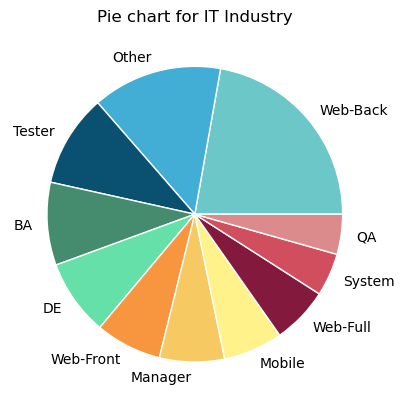

Web-Back: 147 posting (22.21%)
Other: 94 posting (14.2%)
Tester: 67 posting (10.12%)
BA: 60 posting (9.06%)
DE: 55 posting (8.31%)
Web-Front: 48 posting (7.25%)
Manager: 47 posting (7.1%)
Mobile: 43 posting (6.5%)
Web-Full: 41 posting (6.19%)
System: 31 posting (4.68%)
QA: 29 posting (4.38%)


In [117]:
top = 10

industries_statitic = df.groupby(['industries']).size().reset_index(name='industries_counts').sort_values(by='industries_counts', ascending=False)
industries_statitic_trend = industries_statitic.iloc[:top]

other_industries = pd.DataFrame([['Other', industries_statitic.iloc[top:]['industries_counts'].sum()]], columns=['industries', 'industries_counts'])

industries_statitic_trend = pd.concat([industries_statitic_trend, other_industries]).sort_values(by='industries_counts', ascending=False)

pie_chart_show(industries_statitic_trend['industries_counts'], industries_statitic_trend['industries'], title="IT Industry", print_summary = True)

Lấy ra top 10 ngôn ngữ lập trình

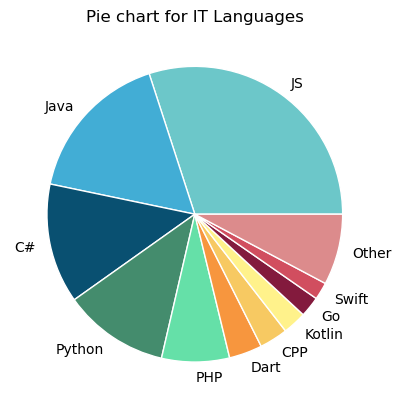

JS: 174 posting (30.0%)
Java: 97 posting (16.72%)
C#: 76 posting (13.1%)
Python: 67 posting (11.55%)
PHP: 43 posting (7.41%)
Dart: 21 posting (3.62%)
CPP: 18 posting (3.1%)
Kotlin: 15 posting (2.59%)
Go: 13 posting (2.24%)
Swift: 11 posting (1.9%)
Other: 45 posting (7.76%)


In [118]:
# Lấy ra số lượng ngôn ngữ và tổng của chúng
languages_label, languages_count = calculate_label_and_count(df['languages'], 10)

# Hiển thị biểu đồ tròn
pie_chart_show(languages_count, languages_label,title = "IT Languages", print_summary = True)

Lấy ra top 7 framework

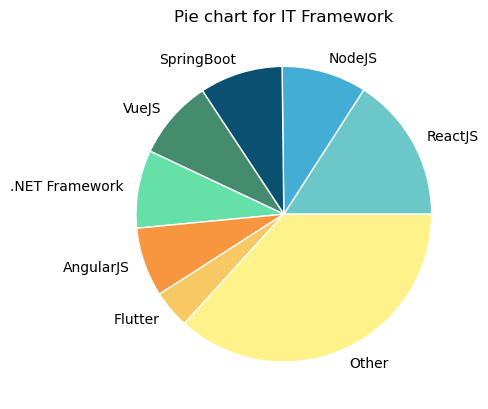

ReactJS: 84 posting (15.91%)
NodeJS: 49 posting (9.28%)
SpringBoot: 48 posting (9.09%)
VueJS: 46 posting (8.71%)
.NET Framework: 45 posting (8.52%)
AngularJS: 40 posting (7.58%)
Flutter: 22 posting (4.17%)
Other: 194 posting (36.74%)


In [130]:
# Lấy ra số lượng framework và tổng của chúng
frameworks_label, frameworks_count = calculate_label_and_count(df['frameworks'], 7)

# Hiển thị biểu đồ tròn
pie_chart_show(frameworks_count, frameworks_label, title = "IT Framework", print_summary = True)

Thống kê kinh nghiệm cần có của ứng viên

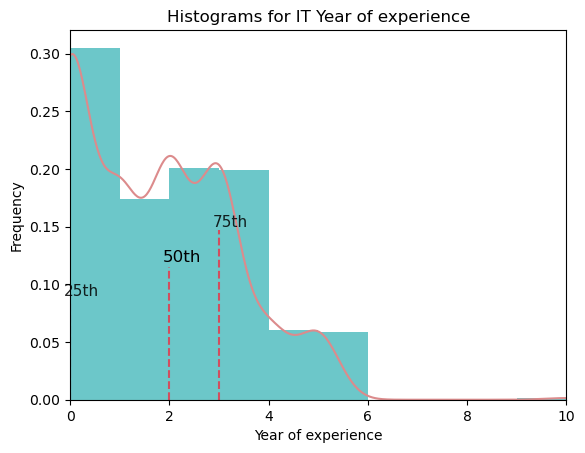

In [120]:
n_bins = 10
fig, ax = plt.subplots()
df['experiences'].plot(kind='hist', bins=n_bins, density=True, color='#6cc7c9')
df['experiences'].plot(kind='kde', color='#dc8b8c')
ax.set_xlabel('Year of experience')
ax.set_ylabel('Frequency')
ax.set_title('Histograms for IT Year of experience')
ax.set_xlim(0,10)

# Calculate percentiles
quant_25, quant_50, quant_75 = df['experiences'].quantile(0.25), df['experiences'].quantile(0.5), df['experiences'].quantile(0.75)

# [quantile, opacity, length]
quants = [[quant_25, 1, 0.26], [quant_50, 1, 0.36],  [quant_75, 1, 0.46]]

# Plot the lines with a loop
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = '--', color='#d14e5f')

ax.text(quant_25-.13, 0.09, "25th", size = 11, alpha = 0.85)
ax.text(quant_50-.13, 0.12, "50th", size = 12, alpha = 1)
ax.text(quant_75-.13, 0.15, "75th", size = 11, alpha = 0.85)

plt.show()

Thống kê về lương tối thiểu

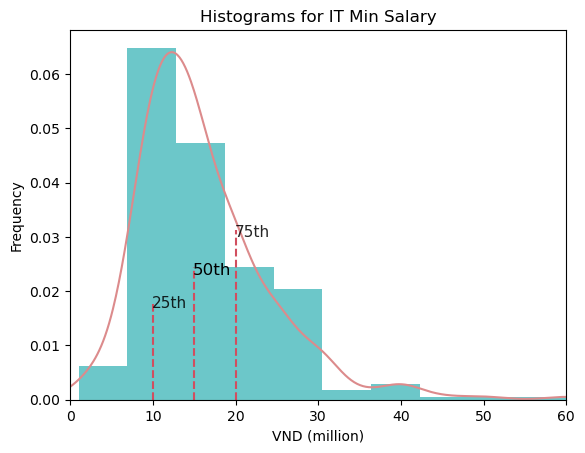

In [121]:
df_min_salary = df.dropna(subset='min_salary')

n_bins = 10
fig, ax = plt.subplots()
df_min_salary['min_salary'].plot(kind='hist', bins=n_bins, density=True, color='#6cc7c9')
df_min_salary['min_salary'].plot(kind='kde', color='#dc8b8c')
ax.set_xlabel('VND (million)')
ax.set_ylabel('Frequency')
ax.set_title('Histograms for IT Min Salary')
ax.set_xlim(0,60)

# Calculate percentiles
quant_25, quant_50, quant_75 = df_min_salary['min_salary'].quantile(0.25), df_min_salary['min_salary'].quantile(0.5), df_min_salary['min_salary'].quantile(0.75)

# [quantile, opacity, length]
quants = [[quant_25, 1, 0.26], [quant_50, 1, 0.36],  [quant_75, 1, 0.46]]

# Plot the lines with a loop
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = '--',color='#d14e5f')

ax.text(quant_25-.13, 0.017, "25th", size = 11, alpha = 0.85)
ax.text(quant_50-.13, 0.023, "50th", size = 12, alpha = 1)
ax.text(quant_75-.13, 0.030, "75th", size = 11, alpha = 0.85)

plt.show()

Thống kê về lương tối đa

Text(34.87, 0.02, '75th')

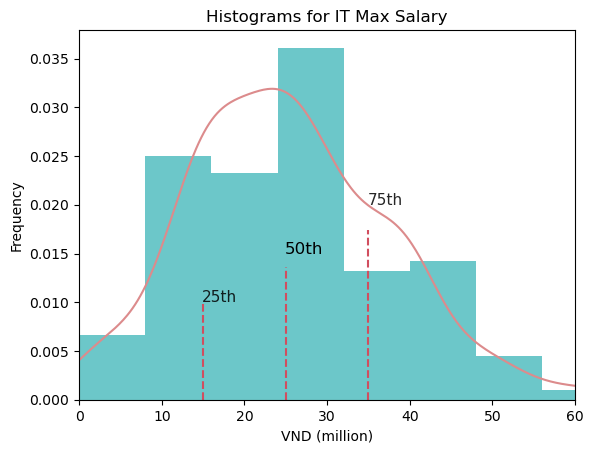

In [122]:
df_max_salary = df.dropna(subset='max_salary')

n_bins = 10
fig, ax = plt.subplots()
df_max_salary['max_salary'].plot(kind='hist', bins=n_bins, density=True, color='#6cc7c9')
df_max_salary['max_salary'].plot(kind='kde', color='#dc8b8c')
ax.set_xlabel('VND (million)')
ax.set_ylabel('Frequency')
ax.set_title('Histograms for IT Max Salary')
ax.set_xlim(0,60)

# Calculate percentiles
quant_25, quant_50, quant_75 = df_max_salary['max_salary'].quantile(0.25), df_max_salary['max_salary'].quantile(0.5), df_max_salary['max_salary'].quantile(0.75)

# [quantile, opacity, length]
quants = [[quant_25, 1, 0.26], [quant_50, 1, 0.36],  [quant_75, 1, 0.46]]

# Plot the lines with a loop
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = '--',color='#d14e5f')

ax.text(quant_25-.13, 0.010, "25th", size = 11, alpha = 0.85)
ax.text(quant_50-.13, 0.015, "50th", size = 12, alpha = 1)
ax.text(quant_75-.13, 0.020, "75th", size = 11, alpha = 0.85)

Chạy ols để tìm ra công thức tốt nhất cho mức lương tối thiểu

In [123]:
NOT_CHANGE_MODEL = 0
CHANGE_MODEL = 1

In [124]:
def analytics(formula: str, data: DataFrame):
    result = smf.ols(formula, data).fit()
    return result

In [125]:
def concat_formula(des_attr:str, list_attr:list):
    formula = f"{des_attr} ~ {list_attr[0]}"
    list_attr = list_attr.copy()
    list_attr.pop(0)
    for attr in list_attr:
        formula = f"{formula} + {attr}"
    return formula

def choice_attr(current_attr: list, addition_attr: str):
    current_attr.append(addition_attr)
    return current_attr

def choice_model(current_model, compare_model):
    # 0 -> not change
    # 1 -> change
    if (current_model.rsquared_adj > compare_model.rsquared_adj):
        return 0
    else:
        if (current_model.rsquared_adj < compare_model.rsquared_adj):
            return 1
        if (current_model.rsquared_adj == compare_model.rsquared_adj):
            if (current_model.aic > compare_model.aic):
                return 1
            elif (current_model.aic < compare_model.aic):
                return 0
    return 0

**Tìm công thức tốt nhất cho biến min_salary**

In [126]:
# Biến đích cần thực hiện tìm kiếm công thức
des_attr = 'min_salary'

# Data pre-processing
attrs_df = df_min_salary.columns.to_list()

# Xóa những biến không dùng đến
remove_attr = [
    'job_id',
    'job_title',
    'job_tags',
    'max_salary',
    'company_name']

df_min_salary = df_min_salary.drop(columns=remove_attr)

# Chuẩn hóa dữ liệu theo các cột 
normalize_data = ['languages', 
                  'frameworks']

for column_normalize in normalize_data:
    before_df = df_min_salary[column_normalize]
    df_min_salary[column_normalize] = df_min_salary[column_normalize].apply(lambda x: 0 if (pd.isna(x)) else len(x.split(',')))

# Chuẩn hóa dữ liệu các cột bằng phương pháp label encoding
normalize_data = ['company_address',
                  'industries',
                  'company_size']

label_encode_data = {}

# Label encode
for column_normalize in normalize_data:
    before_df = df_min_salary[column_normalize]
    before_df_row = {}
    after_df_row = []
    i = 1
    
    for data in before_df:
        if (data not in before_df_row.keys()):
            before_df_row.update({f'{data}':i})
            i+=1
        after_df_row.append(before_df_row[f'{data}'])
    df_min_salary[column_normalize] = after_df_row

    label_encode_data[f'{column_normalize}'] = before_df_row.copy()

attrs_df = [attr for attr in attrs_df if attr not in [*remove_attr, des_attr]]

# Bắt đầu tìm công thức tối đa
attrs_best_model = [attrs_df[0]]
best_model_min_salary = analytics(concat_formula(des_attr, attrs_best_model) ,df_min_salary)
attrs_current_model = []

for i in tqdm(range(0, len(attrs_df)), desc=f'{i}'):
    for attr in attrs_df:
        if (attr not in attrs_best_model):
            attrs_current_model.append(attr)
            compare_model = analytics(concat_formula(des_attr, attrs_current_model) ,df_min_salary)
            if (choice_model(best_model_min_salary, compare_model) == CHANGE_MODEL):
                attrs_best_model = attrs_current_model.copy()
                best_model_min_salary = analytics(concat_formula(des_attr, attrs_best_model) ,df_min_salary)
            attrs_current_model.pop()
    attrs_current_model = attrs_best_model.copy()
print(best_model_min_salary.summary())
print("Formula: ", concat_formula(des_attr, attrs_best_model))

11: 100%|██████████| 6/6 [00:00<00:00, 24.22it/s]

                            OLS Regression Results                            
Dep. Variable:             min_salary   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     31.22
Date:                Sat, 20 Jul 2024   Prob (F-statistic):           1.16e-21
Time:                        05:16:39   Log-Likelihood:                -989.37
No. Observations:                 298   AIC:                             1989.
Df Residuals:                     293   BIC:                             2007.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           9.0605      0.956     

**Tìm công thức tốt nhất cho biến max_salary**

In [127]:
# Biến đích cần thực hiện tìm kiếm công thức
des_attr = 'max_salary'

# Data pre-processing
attrs_df = df_max_salary.columns.to_list()

# Xóa những biến không dùng đến
remove_attr = [
    'job_id',
    'job_title',
    'job_tags',
    'min_salary',
    'company_name']

df_max_salary = df_max_salary.drop(columns=remove_attr)

# Chuẩn hóa dữ liệu theo các cột 
normalize_data = ['languages', 
                  'frameworks']

for column_normalize in normalize_data:
    before_df = df_max_salary[column_normalize]
    df_max_salary[column_normalize] = df_max_salary[column_normalize].apply(lambda x: 0 if (pd.isna(x)) else len(x.split(',')))

# Chuẩn hóa dữ liệu các cột bằng phương pháp label encoding
normalize_data = ['company_address',
                  'industries',
                  'company_size']

label_encode_data = {}

# Label encode
for column_normalize in normalize_data:
    before_df = df_max_salary[column_normalize]
    before_df_row = {}
    after_df_row = []
    i = 1
    
    for data in before_df:
        if (data not in before_df_row.keys()):
            before_df_row.update({f'{data}':i})
            i+=1
        after_df_row.append(before_df_row[f'{data}'])
    df_max_salary[column_normalize] = after_df_row

    label_encode_data[f'{column_normalize}'] = before_df_row.copy()

attrs_df = [attr for attr in attrs_df if attr not in [*remove_attr, des_attr]]

# Bắt đầu tìm công thức tối đa
attrs_best_model = [attrs_df[0]]
best_model_max_salary = analytics(concat_formula(des_attr, attrs_best_model) ,df_max_salary)
attrs_current_model = []

for i in tqdm(range(0, len(attrs_df)), desc=f'{i}'):
    for attr in attrs_df:
        if (attr not in attrs_best_model):
            attrs_current_model.append(attr)
            compare_model = analytics(concat_formula(des_attr, attrs_current_model) ,df_max_salary)
            if (choice_model(best_model_max_salary, compare_model) == CHANGE_MODEL):
                attrs_best_model = attrs_current_model.copy()
                best_model_max_salary = analytics(concat_formula(des_attr, attrs_best_model) ,df_max_salary)
            attrs_current_model.pop()
    attrs_current_model = attrs_best_model.copy()
print(best_model_max_salary.summary())
print("Formula: ", concat_formula(des_attr, attrs_best_model))

11: 100%|██████████| 6/6 [00:00<00:00, 31.61it/s]

                            OLS Regression Results                            
Dep. Variable:             max_salary   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     35.89
Date:                Sat, 20 Jul 2024   Prob (F-statistic):           2.74e-20
Time:                        05:16:39   Log-Likelihood:                -1374.7
No. Observations:                 360   AIC:                             2757.
Df Residuals:                     356   BIC:                             2773.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      16.9602      1.348     12.581      

Test predict avarage salary of job posting

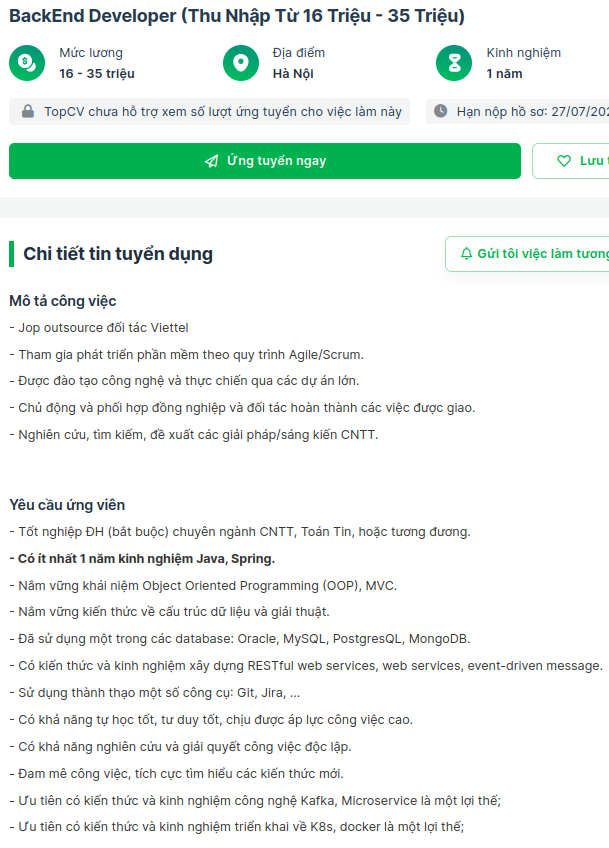

**Dự đoán cho biến min salary**

In [128]:
test_data = {
    'experiences': 1,
    'languages': 1,
    'company_address': 'Hà Nội',
    'industries': 'Web-Back',
}
min_real = 16

# Formula:  min_salary ~ experiences + company_address + industries + languages

# Encode test data
for key, item in test_data.items():
    if key in label_encode_data.keys():
        if item in label_encode_data[f'{key}']:
            test_data.update({f'{key}':label_encode_data[f'{key}'][f'{item}']})
        else: 
            label_encode_data[f'{key}'][f'{item}'] = max(label_encode_data.values) + 1
        
        
print('predict: ', round(best_model_min_salary.predict(test_data)[0], 2))
print('real: ', round(min_real, 2))

predict:  13.12
real:  16


**Dự đoán cho biến max salary**

In [129]:
test_data = {
    'experiences': 1,
    'languages': 1,
    'industries': 'Web-Back',
}
max_real = 35

# Formula: max_salary ~ experiences + languages + industries

# Encode test data
for key, item in test_data.items():
    if key in label_encode_data.keys():
        if item in label_encode_data[f'{key}']:
            test_data.update({f'{key}':label_encode_data[f'{key}'][f'{item}']})
        else: 
            label_encode_data[f'{key}'][f'{item}'] = max(label_encode_data.values) + 1
        
        
print('predict: ', round(best_model_max_salary.predict(test_data)[0], 2))
print('real: ', round(max_real, 2))

predict:  22.73
real:  35
